# 5.1 상관분석

In [1]:
import pandas as pd

In [2]:
w=pd.read_csv('ch5-1.csv') #w 변수에 데이터 셋 입력

In [3]:
w.head() #상위 5개 데이터 확인

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [4]:
w.info() #데이터 구조 및 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
w_n=w.iloc[:,1:5] #w데이터 셋에서 1~4열 데이터만 가져오기

In [6]:
w_n.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [7]:
w_cor=w_n.corr(method='pearson') #상관분석 실시
w_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


In [10]:
#상관관계 시각화를 위한 모듈 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

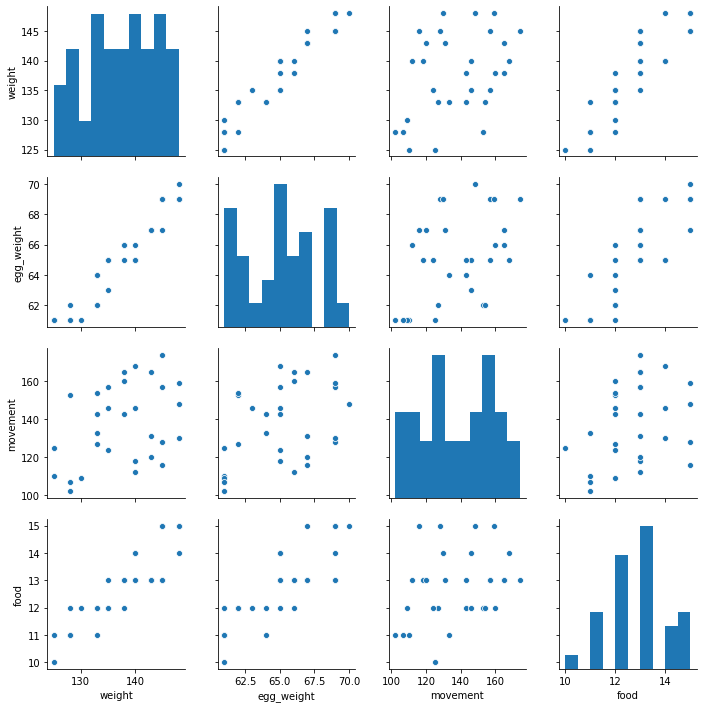

In [11]:
sns.pairplot(w_n)

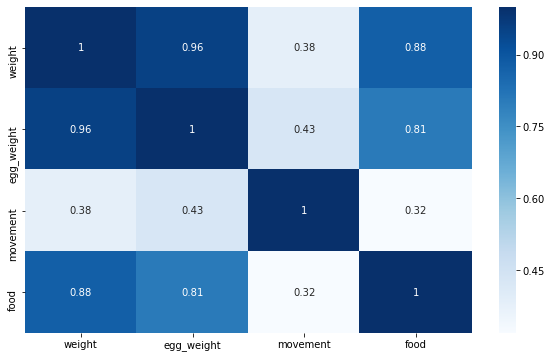

In [13]:
#상관행렬도 그리기
plt.figure(figsize=(10,6))
sns.heatmap(w_cor, annot=True, cmap='Blues')

# 5.2 회귀분석

In [14]:
#회귀분석 수행을 위한 모듈 불러오기 및 smf라는 약어로 지칭하기
import statsmodels.formula.api as smf

In [15]:
#종란무게 - 병아리 몸무게 단순 선형 회귀모델 구축
model_lm=smf.ols(formula='weight~egg_weight',data=w_n)

In [16]:
#모델 학습
result_lm=model_lm.fit()

In [18]:
#모델 결과 확인
result_lm.summary()
#1. R-squared 값 : 결정계수
#2. Prob (F-statistic) : p-value 0.05
#3. coef : 독립변수의 기울기
#P>|t| : p값이 0.05보다 작으면 유의함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.32e-16
Time:                        18:33:39   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

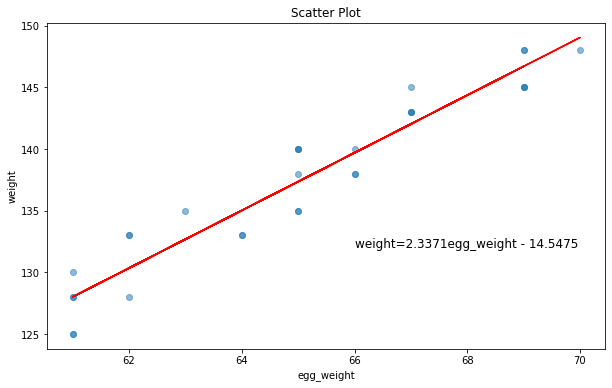

In [21]:
#종란 무게에 따른 병아리 몸무게 산점도
plt.figure(figsize=(10,6))
plt.scatter(w.egg_weight,w.weight, alpha=.5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color='red')
plt.text(66, 132, 'weight=2.3371egg_weight - 14.5475',fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show

In [22]:
#잔차 5개만 확인
result_lm.resid.head()

0    2.633714
1   -2.354880
2    2.633714
3   -2.366286
4   -1.714829
dtype: float64

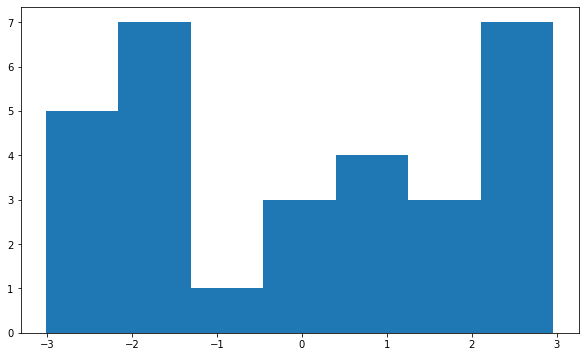

In [23]:
#잔차 히스토그램 그리기
plt.figure(figsize=(10,6))
plt.hist(result_lm.resid, bins=7)
plt.show()

## 5.2.3 다중 회귀분석

In [24]:
#병아리 몸무게 예측을 위한 다중 회귀분석 실시
model_mlm=smf.ols(formula='weight~egg_weight + food + movement', data=w_n)

In [25]:
result_mlm=model_mlm.fit()

In [26]:
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           8.46e-17
Time:                        18:43:42   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#병아리 몸무게 예측을 위한 다중 회귀분석 실시2
model_mlm2=smf.ols(formula='weight~egg_weight + food + movement', data=w_n)

In [28]:
result_mlm2=model_mlm.fit()

In [29]:
result_mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           8.46e-17
Time:                        18:44:33   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5.2.4 다중공선성

In [30]:
#다중공선성 확인을 위한 함수 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#회귀모델 변수명 속성
model_mlm2.exog_names

['Intercept', 'egg_weight', 'food', 'movement']

In [33]:
#1번째 변수 vif 계산
vif1=variance_inflation_factor(model_mlm2.exog,1)

In [32]:
#2번째 변수 vif 계산
vif2=variance_inflation_factor(model_mlm2.exog,2)

In [34]:
print(vif1, vif2)

3.17905940457344 2.890163341279102


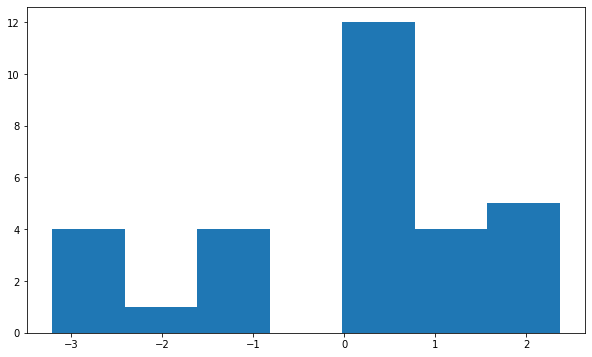

In [35]:
#잔차 히스토그램 그리기
plt.figure(figsize=(10,6))
plt.hist(result_mlm2.resid, bins=7)
plt.show()

## 5.2.5 비선형 회귀분석

In [38]:
w2=pd.read_csv('ch5-2.csv')
w2.head()

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104


<function matplotlib.pyplot.show(*args, **kw)>

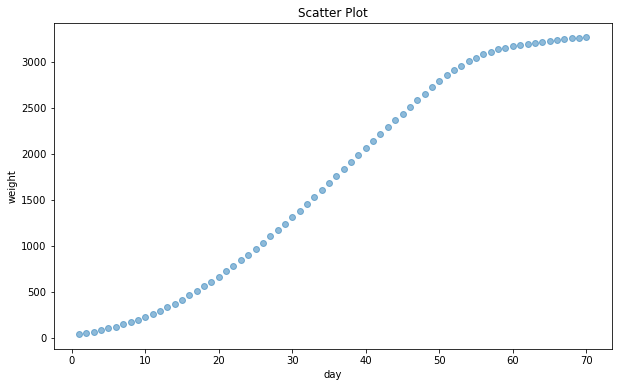

In [39]:
#성장기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10,6))
plt.scatter(w2.day,w2.weight, alpha=.5)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show

In [40]:
#성장기간에 따른 병아리 몸무게 변화 선형 회귀분석 실시
model_lm2=smf.ols(formula='weight~day', data=w2)
result_lm2=model_lm2.fit()
result_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.22e-59
Time:                        18:52:30   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(*args, **kw)>

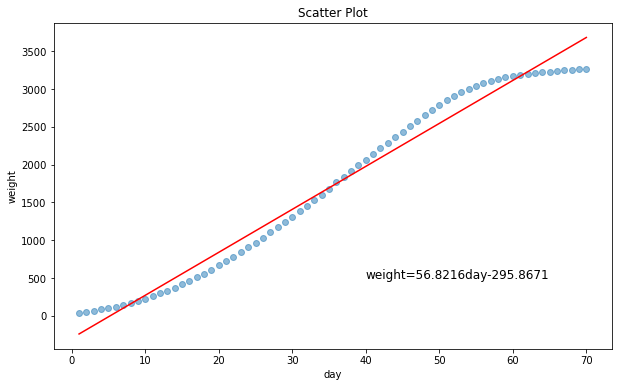

In [42]:
#성장기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10,6))
plt.scatter(w2.day,w2.weight, alpha=.5)
plt.plot(w2.day, w2.day*56.8216 - 295.8671, color='red')
plt.text(40, 500, 'weight=56.8216day-295.8671', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show

In [46]:
#성장기간에 따른 병아리 몸무게 변화 비선형 회귀분석 실시
model_nlm=smf.ols(formula='weight~I(day**3)+I(day**2)+day', data=w2)
result_nlm=model_nlm.fit()
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          7.13e-109
Time:                        18:57:36   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

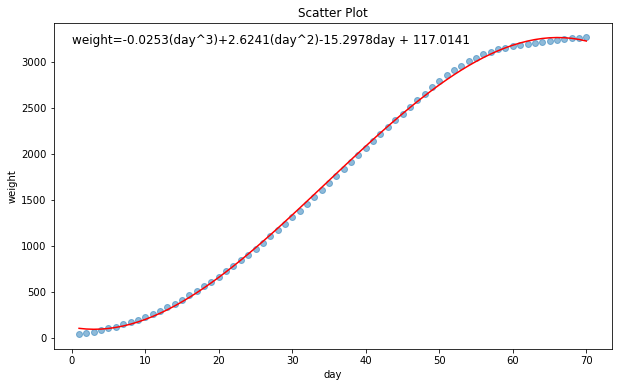

In [49]:
#성장기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10,6))
plt.scatter(w2.day,w2.weight, alpha=.5)
plt.plot(w2.day, (w2.day**3)*(-0.0253) + (w2.day**2)*2.6241 + w2.day*(-15.2978) + 117.0141, color='red')
plt.text(0,3200, 'weight=-0.0253(day^3)+2.6241(day^2)-15.2978day + 117.0141', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show